## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### 1. Re-code the house price machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
###### 2.Supervised Direction to get optimal *k* and *b*
###### 3.Gradient Descent to get optimal *k* and *b*
###### 4. Try different Loss function and learning rate. 

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

In [1]:
import random
from sklearn.datasets import load_boston
data = load_boston()
X, y = data['data'], data['target']
X_rm = X[:, 5]

# 1 Random Choose Method to get optimal k and b

In [2]:
def price(r, k, b):
    return k * r + b
def loss(y, y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

min_loss = float('inf')
best_k, best_b = None, None

for i in range(300):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    y_hat = [price(r, k, b) for r in X_rm]

    current_loss = loss(y, y_hat)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print("When time is : {}, get best_k is : {}, best_b : {}, and the min loss is {}".format(i, best_k, best_b, min_loss))  

When time is : 0, get best_k is : 82.22395101066539, best_b : -55.9463269026784, and the min loss is 194757.08020193691
When time is : 1, get best_k is : -71.3276621342853, best_b : 92.99963954863512, and the min loss is 145964.75216457483
When time is : 2, get best_k is : 66.2044050413599, best_b : -84.20640917464488, and the min loss is 97335.94967148518
When time is : 3, get best_k is : 3.9334416008000517, best_b : -47.08494458515151, and the min loss is 2072.5492400953012
When time is : 19, get best_k is : 1.618046642434507, best_b : -29.937304555620827, and the min loss is 1860.5952279777862
When time is : 34, get best_k is : -2.297551903680528, best_b : 23.125085618636803, and the min loss is 299.3666667645134
When time is : 73, get best_k is : 18.588192794577708, best_b : -87.5728660089674, and the min loss is 133.01825551942454
When time is : 228, get best_k is : 8.820365081168433, best_b : -30.062981439740824, and the min loss is 51.68812822805853


# 2 Supervised Direction to get optimal k and b

In [3]:
min_loss = float('inf')
best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

direction = [(+1, -1), (+1, +1), (-1, -1), (-1, +1)]
next_direction = random.choice(direction)

scalar = 0.2

for i in range(2000):
    k_direction, b_direction = next_direction
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]

    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss: 
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        next_direction = next_direction
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    else:
        next_direction = random.choice(direction)

When time is : 0, get best_k: -78.58319136954732 best_b: 47.89354386352791, and the loss is: 223329.56034588782
When time is : 1, get best_k: -78.38319136954732 best_b: 48.09354386352791, and the loss is: 221949.26419393483
When time is : 2, get best_k: -78.18319136954732 best_b: 48.293543863527916, and the loss is: 220573.25272945157
When time is : 3, get best_k: -77.98319136954731 best_b: 48.49354386352792, and the loss is: 219201.52595243847
When time is : 4, get best_k: -77.78319136954731 best_b: 48.69354386352792, and the loss is: 217834.08386289488
When time is : 5, get best_k: -77.58319136954731 best_b: 48.893543863527924, and the loss is: 216470.92646082147
When time is : 6, get best_k: -77.3831913695473 best_b: 49.09354386352793, and the loss is: 215112.05374621777
When time is : 7, get best_k: -77.1831913695473 best_b: 49.29354386352793, and the loss is: 213757.46571908417
When time is : 8, get best_k: -76.9831913695473 best_b: 49.49354386352793, and the loss is: 212407.16237

When time is : 273, get best_k: -23.98319136954669 best_b: 102.49354386352869, and the loss is: 5590.587244465566
When time is : 274, get best_k: -23.783191369546692 best_b: 102.69354386352869, and the loss is: 5380.01077179018
When time is : 275, get best_k: -23.583191369546693 best_b: 102.89354386352869, and the loss is: 5173.718986584664
When time is : 276, get best_k: -23.383191369546694 best_b: 103.0935438635287, and the loss is: 4971.711888849028
When time is : 277, get best_k: -23.183191369546694 best_b: 103.2935438635287, and the loss is: 4773.989478583282
When time is : 278, get best_k: -22.983191369546695 best_b: 103.4935438635287, and the loss is: 4580.551755787419
When time is : 279, get best_k: -22.783191369546696 best_b: 103.6935438635287, and the loss is: 4391.398720461429
When time is : 280, get best_k: -22.583191369546697 best_b: 103.8935438635287, and the loss is: 4206.530372605325
When time is : 281, get best_k: -22.383191369546697 best_b: 104.09354386352871, and the

# 3 Gradient Descent to get optimal k and b

In [4]:
from icecream import ic

In [5]:
def partial_k(x, y, y_hat):
    n = len(y)
    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    
    return -2 / n * gradient

def partial_b(x, y, y_hat):
    n = len(y)
    gradient = 0
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
    
    return -2 / n * gradient

In [6]:
trying_times = 2000
min_loss = float('inf') 

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 1e-04
update_time = 0

for i in range(trying_times):
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    current_loss = loss(y, price_by_k_and_b)

    if current_loss < min_loss: 
        min_loss = current_loss
        
        if i % 50 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

    k_gradient = partial_k(X_rm, y, price_by_k_and_b)
    b_gradient = partial_b(X_rm, y, price_by_k_and_b)
    
    current_k = current_k + (-1 * k_gradient) * learning_rate
    current_b = current_b + (-1 * b_gradient) * learning_rate

When time is : 0, get best_k: -13.983191369546727 best_b: 112.49354386352883, and the loss is: 283994.36829944473
When time is : 50, get best_k: -13.983191369546727 best_b: 112.49354386352883, and the loss is: 124741.55097926321
When time is : 100, get best_k: -13.983191369546727 best_b: 112.49354386352883, and the loss is: 54806.271715688476
When time is : 150, get best_k: -13.983191369546727 best_b: 112.49354386352883, and the loss is: 24094.455048167263
When time is : 200, get best_k: -13.983191369546727 best_b: 112.49354386352883, and the loss is: 10607.47519886267
When time is : 250, get best_k: -13.983191369546727 best_b: 112.49354386352883, and the loss is: 4684.717980087047
When time is : 300, get best_k: -13.983191369546727 best_b: 112.49354386352883, and the loss is: 2083.760823000776
When time is : 350, get best_k: -13.983191369546727 best_b: 112.49354386352883, and the loss is: 941.5597323744305
When time is : 400, get best_k: -13.983191369546727 best_b: 112.49354386352883,

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414412237&di=8377c38d7b50c6f8d45b92ccc78dc1e7&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_jpg%2FlSyiavfm6wPgQDuDYa42IMgSkLOcPJU91RbkMibGy7VHLrhhNVLibTYk1iaLcmXKTdHc4icTDVia59QFXwqpW8cLflaw%2F640%3Fwx_fmt%3Djpeg)

## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


Ans: 有一些规律或数据间的内在联系，不容易被看到。机器学习就可以提供给我们一些它发现的规律

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans: 随机性太大，即使遇到误差小的系数，也不会对下次的选择产生任何帮助

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans: 是的，第2种比第一种选择方法更好。缺点不是很清楚，可能是不好判断是否到达误差最小值了吧

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans: 沿着梯度反方向，至梯度为0，就可以知道我们已经到达误差最小值了

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans: 多维数据我们叫梯度，一维数据，就是导数。。。下降就是沿梯度相反的方向

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans: 最快找到误差最小值

###### 7. Using the simple words to describe: What's the machine leanring.

Ans: 让电脑自己通过数据找到规律，生成一些公式或系数。再次输入新的数据时，电脑可以通过这此顾虑，准确判断

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 



![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

In [4]:
import requests 
import re 

In [5]:
url = "http://bj.bendibao.com/ditie/"
lines = re.findall('<a style="color:#.+?;" href="/ditie/(.+?)" target="_blank">', requests.get(url+"linemap.shtml").text)

station_per_line = dict() 
stations = set() 

station_with_change = r'<a class="link" href="/ditie/zd_.+?\.shtml">(.+?)$'
station_without_change = '<a href="/ditie/zd_.+?\.shtml" class="link" target="_blank">(.+?)$'

for line in lines:
    #station_in_order = []
    order = []
    for text in requests.get(url+line).text.split("</a>"):
        if re.search(station_with_change, text):
            stations.update(re.findall(station_with_change, text))
            order.append(re.findall(station_with_change, text)[0])
        if re.search(station_without_change, text):
            stations.update(re.findall(station_without_change, text))
            order.append(re.findall(station_without_change, text)[0])
        else: continue
    station_per_line[line] = order

In [6]:
station_per_line['map_211.shtml']

['积水潭',
 '鼓楼大街',
 '安定门',
 '雍和宫',
 '东直门',
 '东四十条',
 '朝阳门',
 '建国门',
 '北京站',
 '崇文门',
 '前门',
 '和平门',
 '宣武门',
 '长椿街',
 '复兴门',
 '阜成门',
 '车公庄',
 '西直门']

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

In [7]:
import pandas as pd 
file = pd.read_table('C:/MAY_AI/TrainingCourse/NLP_Course/2019-07-06/homework/stationinfo.csv', sep = ',',encoding='gbk')
file.head()

,station_name,lat,lon
0,苹果园,39.926325,116.177781
1,古城,39.907201,116.190248
2,八角游乐园,39.907432,116.212821
3,八宝山,39.907267,116.235824
4,玉泉路,39.907333,116.253033


In [8]:
station_lat_lon = {}
for i in range(len(file)):
    station_lat_lon[file["station_name"][i]] = (file["lat"][i], file["lon"][i])

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

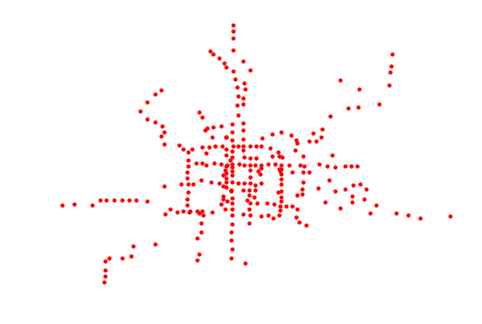

In [10]:
station_graph = nx.Graph()                
station_graph.add_nodes_from(list(station_lat_lon.keys()))   #city_graph.add_nodes_from(list(city_location.keys()))
nx.draw(station_graph, station_lat_lon, with_labels=False, node_size=10)

In [11]:
file1 = pd.read_table('C:/MAY_AI/TrainingCourse/NLP_Course/2019-07-06/homework/connection_info_src.csv', sep = ',',encoding='gbk',na_values = None)

import math
connection_info_src = {}

for i in range(len(file1)):
    connection_info_src[file1["station_name"][i]] = [file1["Unnamed: 1"][i], file1["Unnamed: 2"][i], file1["Unnamed: 3"][i], file1["Unnamed: 4"][i], file1["Unnamed: 5"][i]]

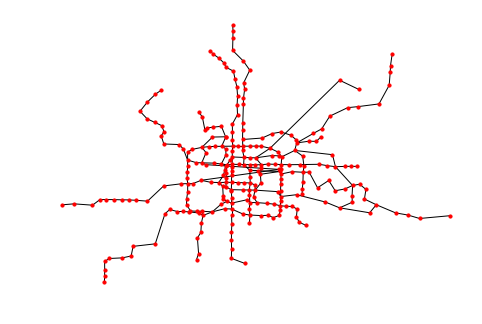

In [12]:
connection_info = {}

for k,v in connection_info_src.items():
    connection_info[k] = [x for x in v if str(x) != 'nan']
    
nx.draw(nx.Graph(connection_info), station_lat_lon, with_labels=False, node_size=10)

##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('奥体中心', '天安门') 
```
you need get the result: 

奥体中心-> A -> B -> C -> ... -> 天安门



In [13]:
def search(start, end):
    pathes = [[start]] 
    passed = [start] 

    while pathes: 
        path = pathes.pop(0) 
        frontier = path[-1] 
        nxt = connection_info[frontier] 

        for station in nxt:
            if station in passed:  
                continue
            else:
                new_path = path + [station] 
                pathes.append(new_path) 
                if station == end: return new_path 
                passed.append(station)
                
def pretty_print(stations):
    print("->".join(stations))

In [15]:
pretty_print(search("奥体中心", "天安门东"))

奥体中心->北土城->安华桥->鼓楼大街->什刹海->南锣鼓巷->东四->灯市口->东单->王府井->天安门东


## （Optional）Create different policies for transfer system.


以下部门为可选部分，请酌情完成。 并不要求全部同学完成。

As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因


恭喜，完成本次课程，你对常用的人工智能方法以及有一定的了解了。基于规则的，基于概率模型的，基于搜索的，基于机器学习的。 可以说，我们现在通常见到的方法都能够归属到这几类方法中。 这就是**人工智能**，并没有很难是吧？ 继续加油！

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)